# Develop Word2Vec Embedding

In [4]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('models/model.bin')
# load model
new_model = Word2Vec.load('models/model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[ 2.1776333e-03 -9.2499913e-04  5.3157291e-04 -1.2157995e-03
 -4.8548952e-03  2.1709173e-03  2.5921219e-03 -2.5817540e-03
 -3.4307700e-03  1.3788402e-03 -4.7819602e-05  4.0346207e-03
  8.9993770e-04 -1.6808795e-03  2.5935061e-03 -4.0225992e-03
  2.5056771e-03  2.2033642e-03  1.9967838e-03  6.5653259e-04
 -4.4961096e-04  1.3597263e-03 -2.1801812e-03  2.7005037e-04
  3.3012058e-03 -4.8750979e-03 -7.6853944e-04  3.7614366e-03
  4.8949947e-03 -1.5846371e-03 -4.5203823e-03  2.9817433e-04
 -1.3786743e-03  1.1221292e-05  4.6324404e-03 -2.7733888e-03
  4.9455655e-03 -3.3476774e-03 -3.6760333e-03 -3.5931976e-03
  3.9968104e-03  2.6687572e-03 -2.2695286e-03  4.8048403e-03
  1.6900689e-03  3.8672714e-03 -4.2208214e-03  3.1863581e-03
  2.8780473e-03 -4.4711870e-03 -4.7525186e-03  4.6698032e-03
 -4.4054217e-03 -2.3503907e-03  4.4271727e-0

D:\Intalled Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


In [11]:
model.wv.similarity('first', 'second')

0.12918866

# Plot Word Vectors Using PCA
We can create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class as follows.

D:\Intalled Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


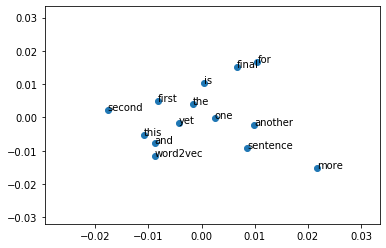

In [13]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# Using GloVe Pre-Trained Model

Method 1

In [20]:
import numpy as np
embeddings_index = {}
with open('data/glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:],dtype='float32')
        embeddings_index[word] = vector

In [39]:
result = embeddings_index['woman'] + embeddings_index['king'] + embeddings_index['man']

Method 2

In [34]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'data/glove.6B.100d.txt'
word2vec_output_file = 'data/glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [36]:
# load the Stanford GloVe model
filename = 'data/glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [37]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698541283607483)]


In [46]:
print(model.similarity('king','prince'))
print(model.similarity('king','queen'))
print(model.similarity('king','man'))

0.76823294
0.7507691
0.5118681


In [50]:
result = model.most_similar(positive=['woman'], topn=5)
print(result)

result = model.most_similar(positive=['king'], topn=5)
print(result)

result = model.most_similar(positive=['chair'], topn=5)
print(result)

[('girl', 0.8472671508789062), ('man', 0.832349419593811), ('mother', 0.827568769454956), ('boy', 0.7720510959625244), ('she', 0.7632068395614624)]
[('prince', 0.7682329416275024), ('queen', 0.7507690787315369), ('son', 0.7020887732505798), ('brother', 0.6985775232315063), ('monarch', 0.6977890729904175)]
[('chairs', 0.7820560336112976), ('head', 0.6700454354286194), ('sitting', 0.6607790589332581), ('door', 0.6043283939361572), ('floor', 0.5983192920684814)]
